# Portfolio Cumulative Return Forecasts
Bryant Crocker 

Importings necessary libraries for analysis.

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ffn
import holoviews as hv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import display
from scipy.optimize import minimize
init_notebook_mode(connected=True)
%matplotlib inline

Using the ffn library to pull in daily stock data.  If the code returns an error run again.  This has to do with issues with the notoriously problematic Yahoo Finance API.

In [19]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('nke,ads,vfc,uaa,aeo,lb,goos,ges,rl')

#Use the pd.head() method to get an idea of what the data looks like and see what day the data starts at
prices.head()

,nke,ads,vfc,uaa,aeo,lb,goos,ges,rl
Date,,,,,,,,,
2017-03-16,56.688087,241.652786,52.063850,19.820000,13.816463,45.943016,16.080000,9.932523,78.408157
2017-03-17,56.884922,241.573914,51.871555,19.379999,13.616364,47.055508,17.230000,10.344471,78.079201
2017-03-20,57.750988,241.110474,51.794640,19.590000,13.340034,46.393532,17.100000,10.188846,76.879478
2017-03-21,57.091595,235.934113,51.006222,18.990000,12.997005,45.216679,16.520000,9.959985,75.689430
2017-03-22,53.066349,237.491974,51.044682,19.090000,13.216164,44.003059,16.049999,9.758589,75.670074


### Returns histograms:

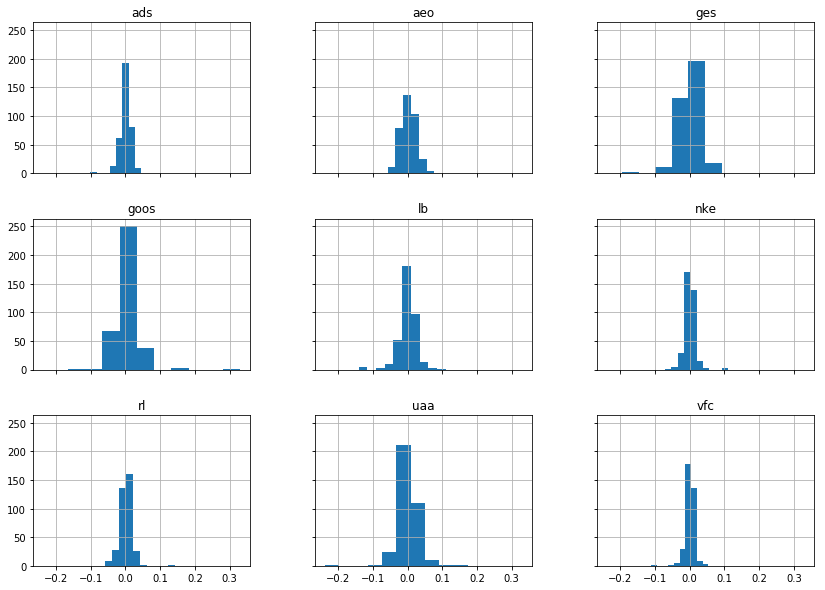

In [20]:
returns = prices.pct_change()
prices.pct_change().hist(figsize = (14, 10), sharex = True, sharey = True)
plt.show()

### Mean variance Optimization portfolio:

In [21]:
weights = ffn.calc_mean_var_weights(returns, covar_method = "standard")
weights.as_format('.2%')

ads      0.00%
aeo     10.99%
ges      8.48%
goos    22.54%
lb       0.00%
nke      2.65%
rl       6.77%
uaa      0.00%
vfc     48.57%
dtype: object

In [27]:
def cum_ret_plot(returns, weights):
    
    # Calculate the weighted stock returns
    WeightedReturns = returns.mul(weights, axis=1)

    # Calculate the portfolio returns
    returns['Portfolio'] = WeightedReturns.sum(axis=1)

    # Plot the cumulative portfolio returns over time
    plt.figure(figsize = (14,10))
    CumulativeReturns = ((1+returns["Portfolio"]).cumprod()-1)
    CumulativeReturns.plot()
    plt.ylabel("Cumulative Returns")
    plt.show()
    return(CumulativeReturns)

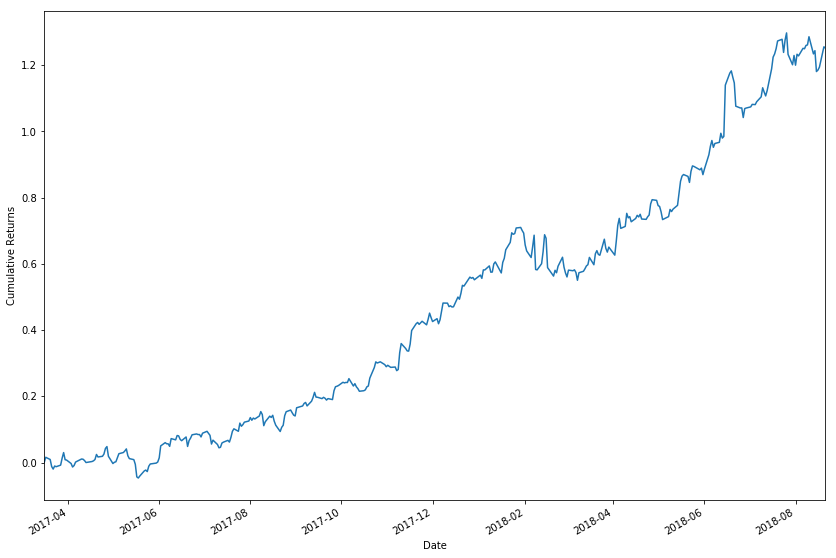

In [28]:
returns_port = cum_ret_plot(returns, weights)

In [32]:
returnsport_df = pd.DataFrame(returns_port).reset_index().rename(columns={"Date": "ds", "Portfolio": "y"})

In [33]:
from fbprophet import Prophet

m = Prophet()
m.fit(returnsport_df)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


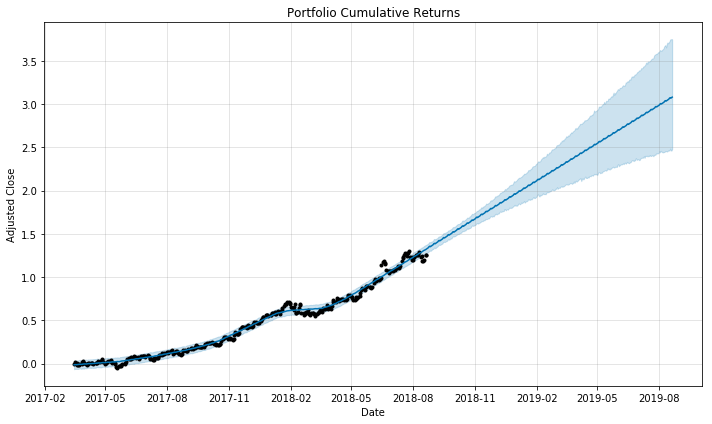

In [34]:
# forecasted portfolio returns
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Portfolio Cumulative Returns")
plt.tight_layout()
plt.savefig("Portfolio.png")
plt.show()

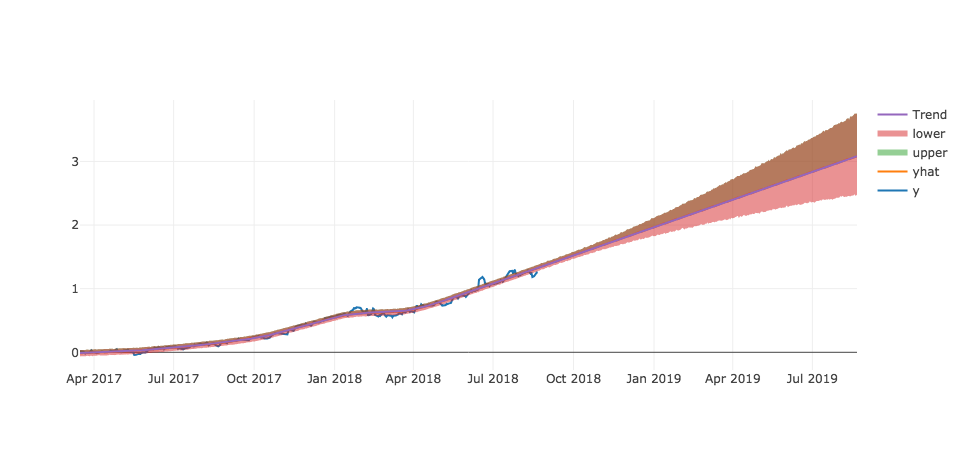

In [35]:
iplot([
    go.Scatter(x=returnsport_df['ds'], y=returnsport_df['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

### Inverse Volatility Optimization Portfolio 

In [13]:
weights2 = ffn.calc_inv_vol_weights(returns)
weights2.as_format('.2%')

nke          12.76%
ads          11.99%
vfc          14.98%
uaa           6.71%
aeo           8.36%
lb            7.71%
goos          6.16%
ges           5.73%
rl           10.57%
Portfolio    15.02%
dtype: object

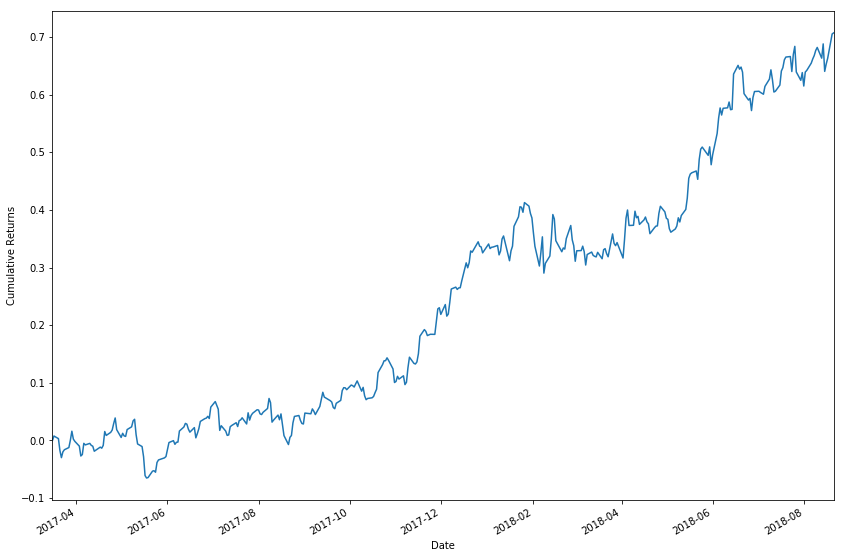

In [29]:
returns_port2 = cum_ret_plot(returns, weights2)
plt.show()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


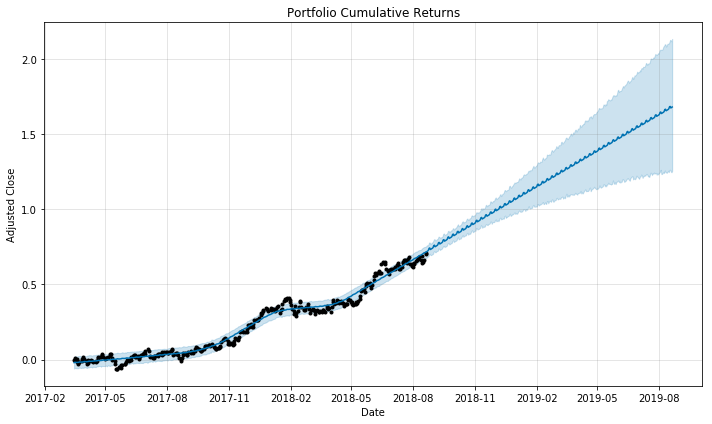

In [30]:
returnsport_df2 = pd.DataFrame(returns_port2).reset_index().rename(columns={"Date": "ds", "Portfolio": "y"})
m = Prophet()
m.fit(returnsport_df2)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
# forecasted portfolio returns
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Portfolio Cumulative Returns")
plt.tight_layout()
plt.savefig("Portfolio2.png")
plt.show()